In [1]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
df_X = data.data
df_y = data.target

In [2]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [3]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [6]:
def model(X,W,b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [7]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

In [8]:
def loss(X,W,b,y):
    predictions = model(X,W,b)
    L = MSE(predictions, y)
    return L

In [9]:
def gradient(X,W,b,y):
    N=len(y)

    y_pred = model(X,W,b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [10]:
LEARNING_RATE = 0.001

In [11]:
%%timeit -n 1 -r 1
global W, b

# Project 1 Result

losses = []

# LEARNING_RATE = 0.001에서는 Iteration 280000 에서 3000보다 낮아짐. 
# LEARNING_RATE 가 높으면 explod 위험 torch나 tf에서는 기본값으로 1e^-5 정도를 줌
for i in range(1,1000001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10000 : Loss 5383.1433
Iteration 20000 : Loss 4880.2227
Iteration 30000 : Loss 4506.1786
Iteration 40000 : Loss 4224.2969
Iteration 50000 : Loss 4008.7412
Iteration 60000 : Loss 3841.2852
Iteration 70000 : Loss 3709.0321
Iteration 80000 : Loss 3602.8208
Iteration 90000 : Loss 3516.1129
Iteration 100000 : Loss 3444.2146
Iteration 110000 : Loss 3383.7324
Iteration 120000 : Loss 3332.1917
Iteration 130000 : Loss 3287.7700
Iteration 140000 : Loss 3249.1095
Iteration 150000 : Loss 3215.1851
Iteration 160000 : Loss 3185.2118
Iteration 170000 : Loss 3158.5789
Iteration 180000 : Loss 3134.8042
Iteration 190000 : Loss 3113.5000
Iteration 200000 : Loss 3094.3502
Iteration 210000 : Loss 3077.0929
Iteration 220000 : Loss 3061.5085
Iteration 230000 : Loss 3047.4101
Iteration 240000 : Loss 3034.6370
Iteration 250000 : Loss 3023.0502
Iteration 260000 : Loss 3012.5280
Iteration 270000 : Loss 3002.9633
Iteration 280000 : Loss 2994.2615
Iteration 290000 : Loss 2986.3385
Iteration 300000 : Loss

In [12]:
prediction = model(X_test, W, b)
mse = loss(X_test, W,b,y_test)
mse

np.float64(2880.2869108266227)

<function matplotlib.pyplot.show(close=None, block=None)>

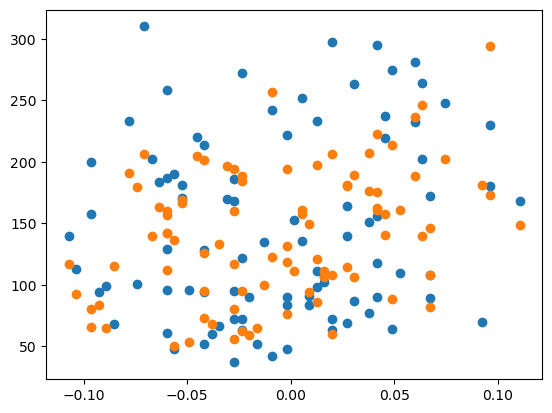

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)

plt.show

In [14]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train = pd.get_dummies(train, columns = ['weather'])
train = pd.get_dummies(train, columns = ['season'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   holiday     10886 non-null  int64         
 2   workingday  10886 non-null  int64         
 3   temp        10886 non-null  float64       
 4   atemp       10886 non-null  float64       
 5   humidity    10886 non-null  int64         
 6   windspeed   10886 non-null  float64       
 7   casual      10886 non-null  int64         
 8   registered  10886 non-null  int64         
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int32         
 11  month       10886 non-null  int32         
 12  day         10886 non-null  int32         
 13  hour        10886 non-null  int32         
 14  minute      10886 non-null  int32         
 15  second      10886 non-null  int32         
 16  weather_1   10886 non-

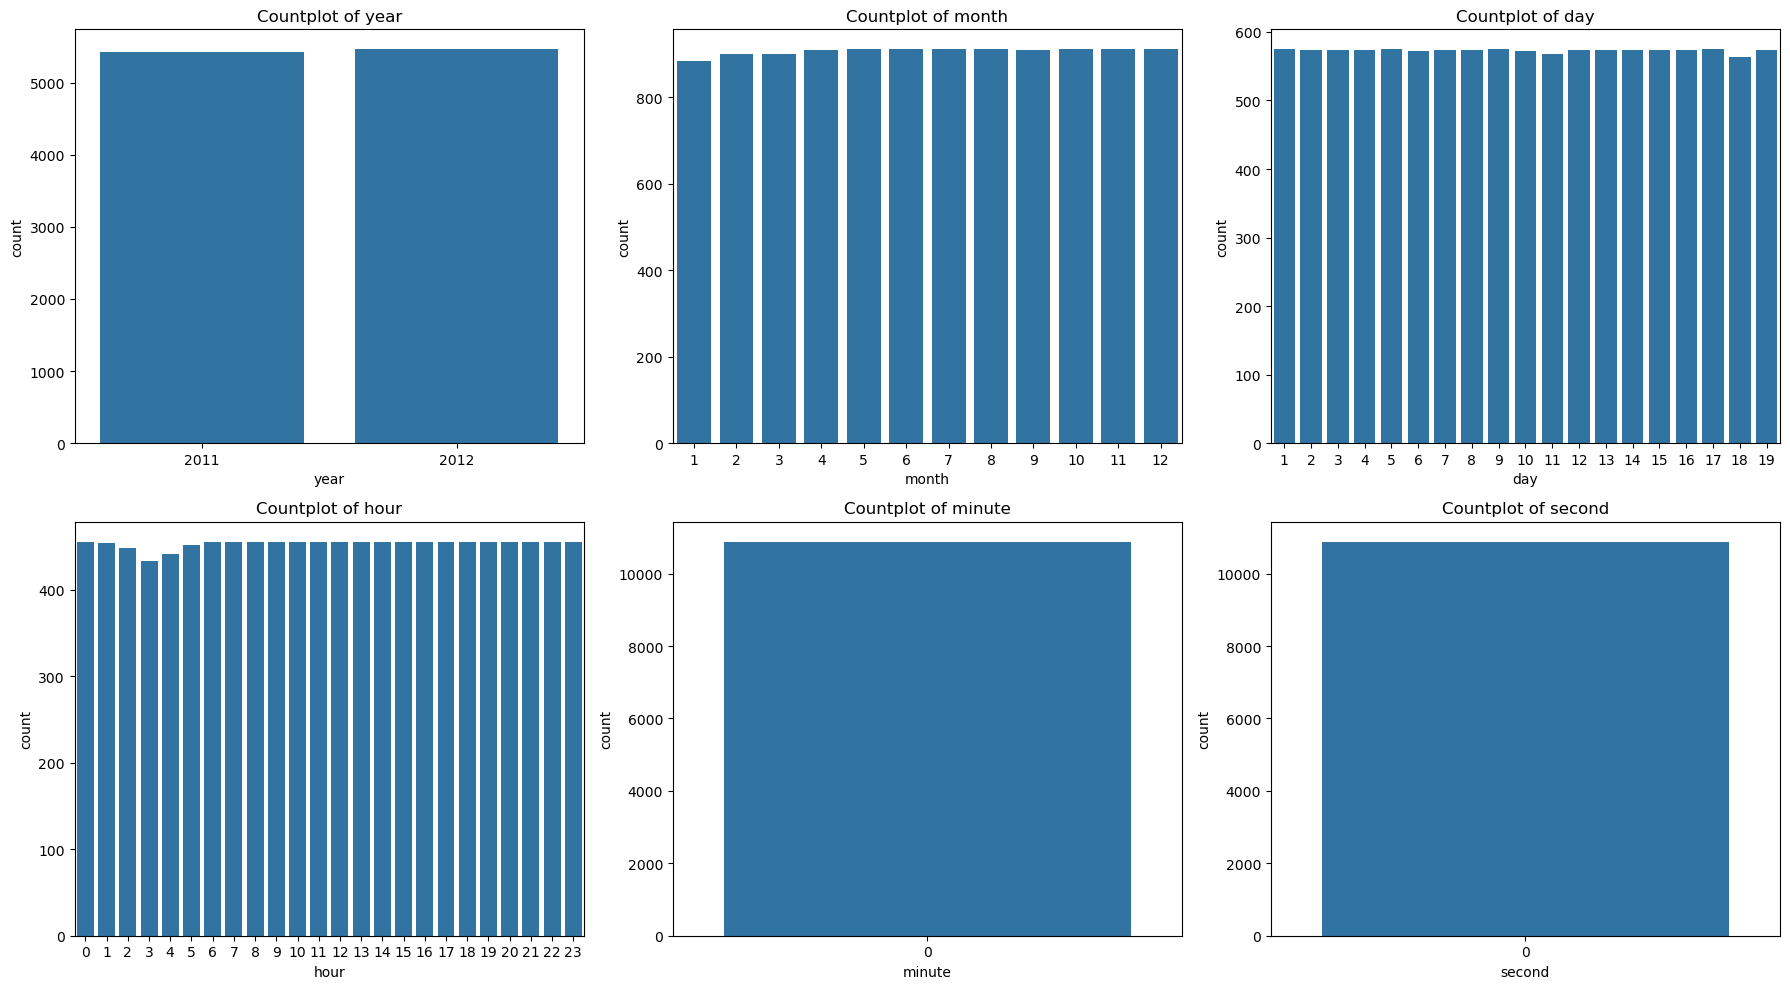

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year','month','day', 'hour', 'minute','second']
for ax, col in zip(axs.flatten(),cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [18]:
print(train.columns)

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'season_1', 'season_2', 'season_3', 'season_4'],
      dtype='object')


In [19]:
def Outliers(x, cols = None):
    if cols is None:
        cols = x.columns
    for col in cols:
        Q1 = x[col].quantile(0.25)
        Q3 = x[col].quantile(0.75)
        IQR = Q3 - Q1

        x = x[(x[col] > Q1 - 1.5*IQR) | (x[col] < Q3 + 1.5*IQR)]
    return x

train_outlier = Outliers(train, cols = ['temp', 'atemp', 'humidity', 'windspeed'])
train_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   holiday     10886 non-null  int64         
 2   workingday  10886 non-null  int64         
 3   temp        10886 non-null  float64       
 4   atemp       10886 non-null  float64       
 5   humidity    10886 non-null  int64         
 6   windspeed   10886 non-null  float64       
 7   casual      10886 non-null  int64         
 8   registered  10886 non-null  int64         
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int32         
 11  month       10886 non-null  int32         
 12  day         10886 non-null  int32         
 13  hour        10886 non-null  int32         
 14  minute      10886 non-null  int32         
 15  second      10886 non-null  int32         
 16  weather_1   10886 non-

In [20]:
len(train_outlier[train_outlier['windspeed']==0])

1313

In [21]:
train_outlier = train_outlier[train_outlier['windspeed']>0]

In [22]:
len(train_outlier[train_outlier['windspeed']==0])

0

In [23]:
from sklearn.model_selection import train_test_split

train = train_outlier

features = ['year','month','day', 'hour','temp','humidity','windspeed']
X = train[features]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
from sklearn.ensemble import RandomForestRegressor

#Random forest model과 비교
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
rmse_rf = np.sqrt(mse_rf)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('Random Forest model MSE: ', mse_rf)
print('Random Forest model RMSE: ', rmse_rf)

MSE:  20019.587045335356
RMSE:  141.49058995330876
Random Forest model MSE:  6682.768292845953
Random Forest model RMSE:  81.74820054806071


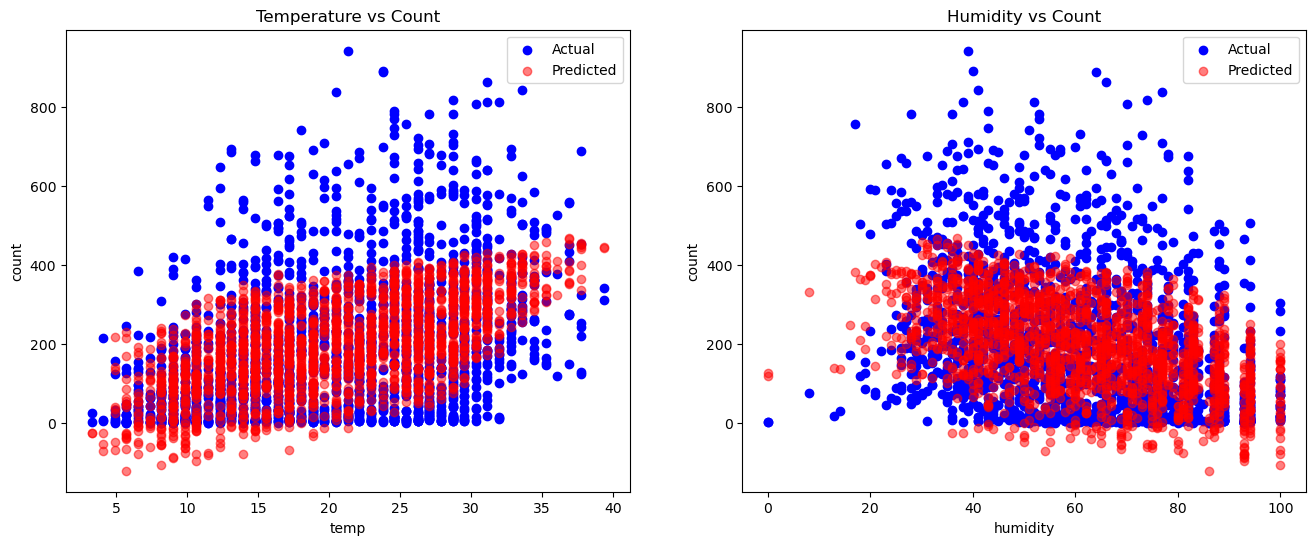

In [27]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

In [28]:
model_rf.feature_importances_

array([0.08700799, 0.06045077, 0.048862  , 0.53939847, 0.15147887,
       0.07597069, 0.03683121])

In [29]:
train.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'season_1', 'season_2', 'season_3', 'season_4'],
      dtype='object')

In [30]:
train.corr()[train.corr() > 0.9]

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,minute,second,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
datetime,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,NaN,NaN,NaN,1.00000,0.98498,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
atemp,NaN,NaN,NaN,0.98498,1.00000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
humidity,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
windspeed,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.970791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.970791,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
from sklearn.preprocessing import StandardScaler
#atemp와 temp에서 다중공진성
#feature importances 보기 위해 전체 학습. registered와 casual 의 합이 count임으로 빼고 계산
features = ['holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'season_1', 'season_2', 'season_3', 'season_4']

continuous_features = ['temp', 'humidity',
       'windspeed', 'year', 'month', 'day',
       'hour', 'minute', 'second']
X = train[features]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

scaler = StandardScaler()
X_train_std = X_train
X_test_std = X_test
X_train_std[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test_std[continuous_features] = scaler.transform(X_test[continuous_features])

model_rf_all = RandomForestRegressor()
model_rf_all.fit(X_train_std, y_train)

y_pred_rf_all = model_rf_all.predict(X_test_std)
mse_rf_all = mean_squared_error(y_test, y_pred_rf_all)
rmse_rf_all = np.sqrt(mse_rf_all)

print('Random Forest model all features MSE: ', mse_rf_all)
print('Random Forest model all features RMSE: ', rmse_rf_all)

Random Forest model all features MSE:  2096.0744392167103
Random Forest model all features RMSE:  45.78290553489053


In [32]:
# minute과 second는 중요도 없음
feature_importances_dict = {}
for i in range(len(model_rf_all.feature_importances_)):
    feature_importances_dict[features[i]] = model_rf_all.feature_importances_[i]

print(pd.DataFrame.from_dict(data=feature_importances_dict, orient='index'))
best = mse_rf_all
best_features = []

                   0
holiday     0.002236
workingday  0.064872
temp        0.118713
humidity    0.033530
windspeed   0.009581
year        0.087176
month       0.036712
day         0.012759
hour        0.610788
minute      0.000000
second      0.000000
weather_1   0.002910
weather_2   0.001172
weather_3   0.011797
weather_4   0.000000
season_1    0.004529
season_2    0.001348
season_3    0.000906
season_4    0.000971


In [33]:
#atemp와 temp에서 다중공진성
features = ['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'year', 'month', 
            'day', 'hour', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 
            'season_1', 'season_2', 'season_3', 'season_4']

continuous_features = ['temp', 'humidity',
       'windspeed', 'year', 'month', 'day',
       'hour', 'minute', 'second']

X = train[features]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

model_rf_select = RandomForestRegressor()
model_rf_select.fit(X_train_std, y_train)

y_pred_rf_select = model_rf_select.predict(X_test_std)
mse_rf_select = mean_squared_error(y_test, y_pred_rf_select)
rmse_rf_select = np.sqrt(mse_rf_select)

# feature importances가 작은 것 부터 feature를 재거하여 가장 좋은걸 기록으로 남김.
if mse_rf_select < best:
    best = mse_rf_select
    best_features = features

# Project 2 Result

print('Random Forest model selected features MSE: ', mse_rf_select)
print('Random Forest model selected features RMSE: ', rmse_rf_select)
print('best score : ', best)
print('best features: ', best_features)

Random Forest model selected features MSE:  2085.0184727937335
Random Forest model selected features RMSE:  45.662002505296826
best score :  2085.0184727937335
best features:  ['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2', 'season_3', 'season_4']


In [34]:
feature_importances_dict = {}
for i in range(len(model_rf_select.feature_importances_)):
    feature_importances_dict[model_rf_select.feature_importances_[i]] = features[i]

print(pd.DataFrame.from_dict(data=feature_importances_dict, orient='index'))
print(feature_importances_dict[model_rf_select.feature_importances_.min()])

                   0
0.002298     holiday
0.066053  workingday
0.116312        temp
0.034099    humidity
0.009759   windspeed
0.087597        year
0.036583       month
0.012478         day
0.609067        hour
0.002815   weather_1
0.001154   weather_2
0.012213   weather_3
0.000000   weather_4
0.006601    season_1
0.001279    season_2
0.000831    season_3
0.000861    season_4
weather_4


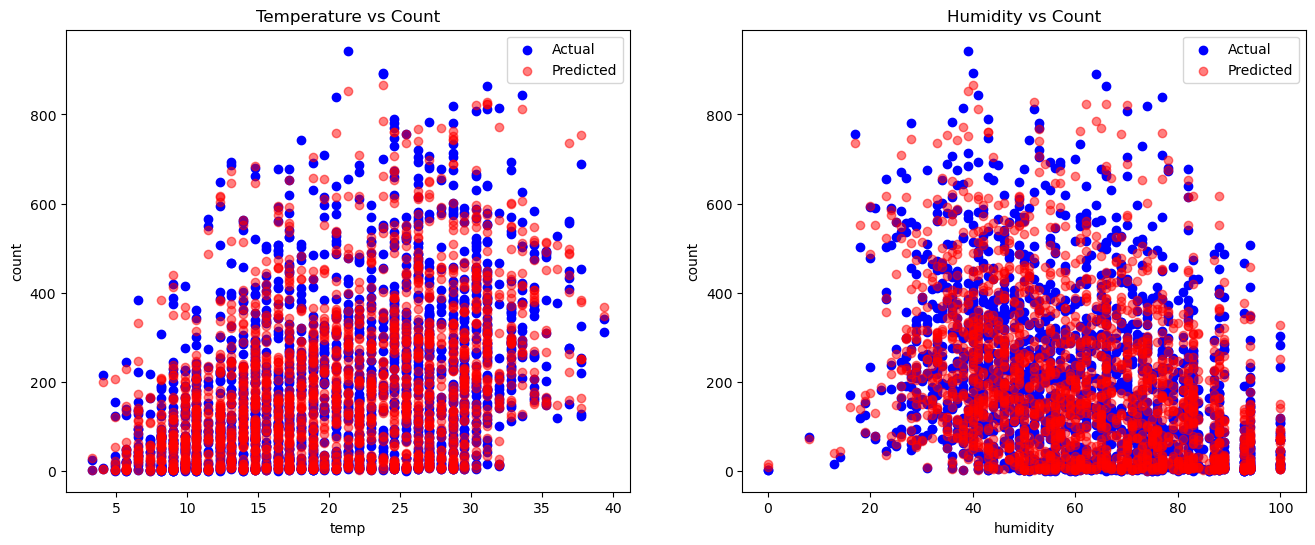

In [35]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

In [36]:
from sklearn.linear_model import LinearRegression

model_selected = LinearRegression()
model_selected.fit(X_train_std , y_train)

y_pred_selected = model_selected.predict(X_test_std)
mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mse_selected)

print('MSE feature selected : ', mse_selected)
print('RMSE feature selected : ', rmse_selected)

MSE feature selected :  19629.632627422918
RMSE feature selected :  140.10579084185963


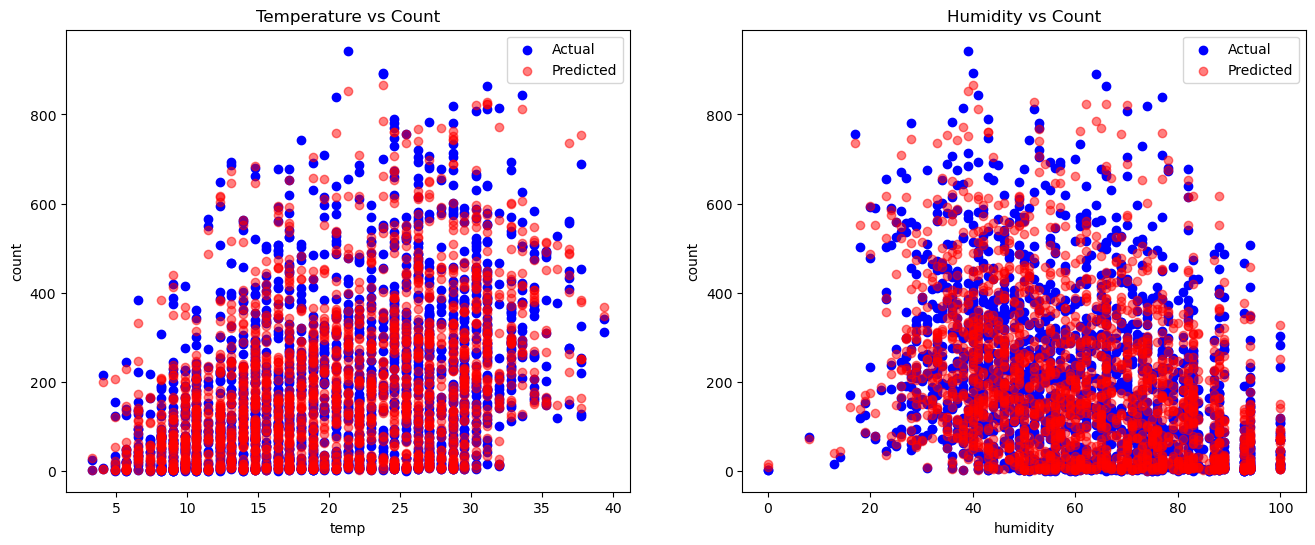

In [37]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

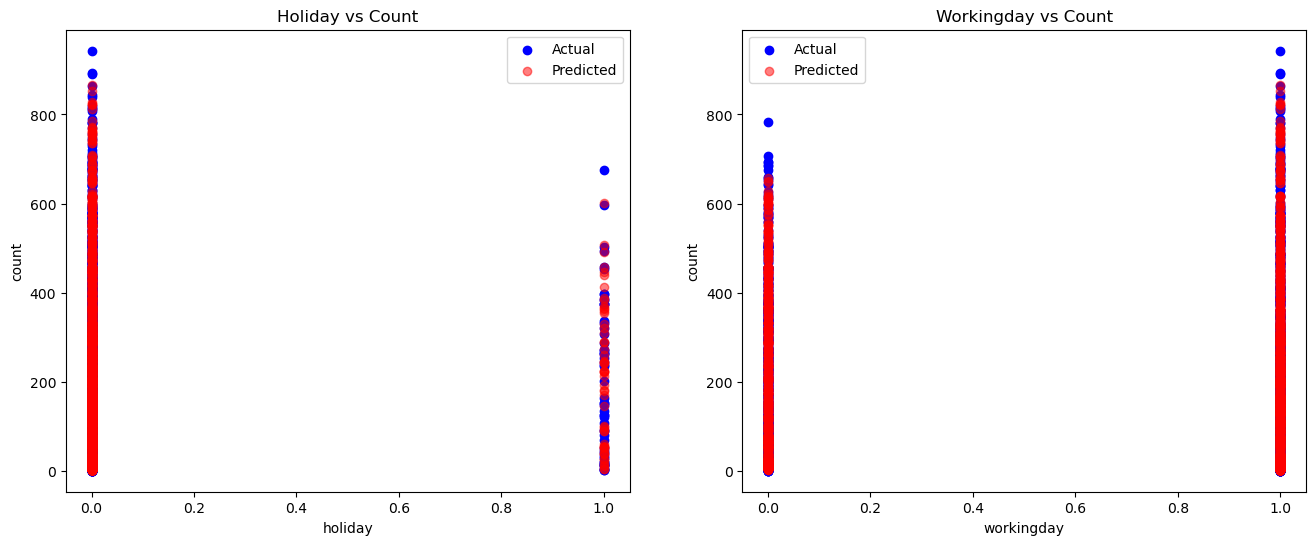

In [38]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['holiday'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['holiday'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('holiday')
axs[0].set_ylabel('count')
axs[0].set_title('Holiday vs Count')
axs[0].legend()

axs[1].scatter(X_test['workingday'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['workingday'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('workingday')
axs[1].set_ylabel('count')
axs[1].set_title('Workingday vs Count')
axs[1].legend()

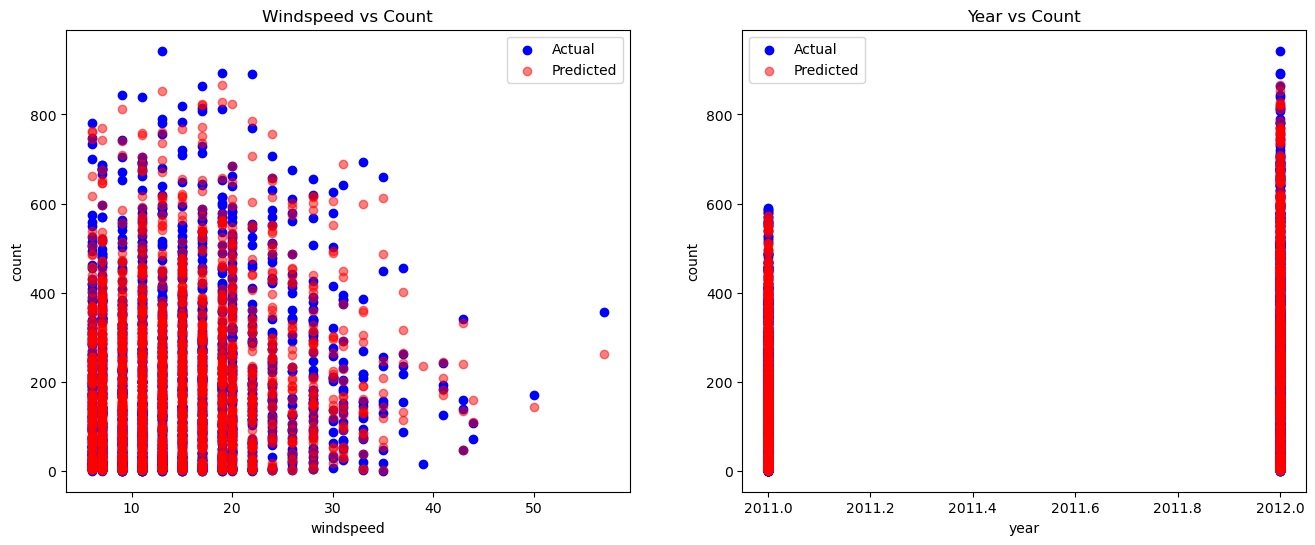

In [39]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['windspeed'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['windspeed'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('windspeed')
axs[0].set_ylabel('count')
axs[0].set_title('Windspeed vs Count')
axs[0].legend()

axs[1].scatter(X_test['year'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['year'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('year')
axs[1].set_ylabel('count')
axs[1].set_title('Year vs Count')
axs[1].legend()

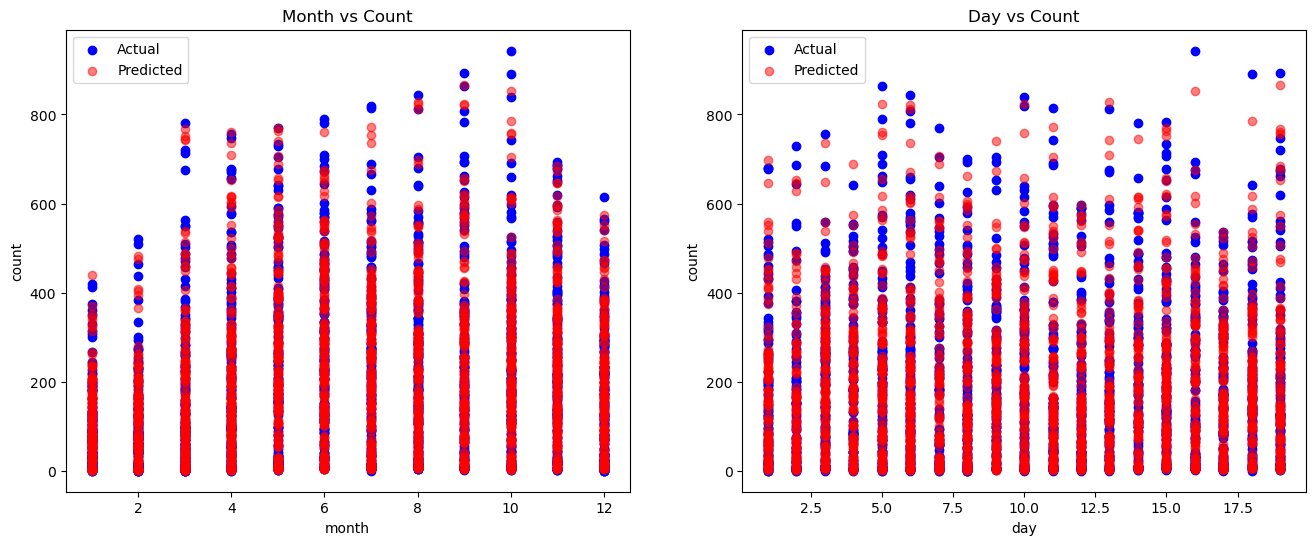

In [40]:
fig, axs = plt.subplots(1, 2, figsize = (16,6))

axs[0].scatter(X_test['month'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['month'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('month')
axs[0].set_ylabel('count')
axs[0].set_title('Month vs Count')
axs[0].legend()

axs[1].scatter(X_test['day'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['day'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('day')
axs[1].set_ylabel('count')
axs[1].set_title('Day vs Count')
axs[1].legend()

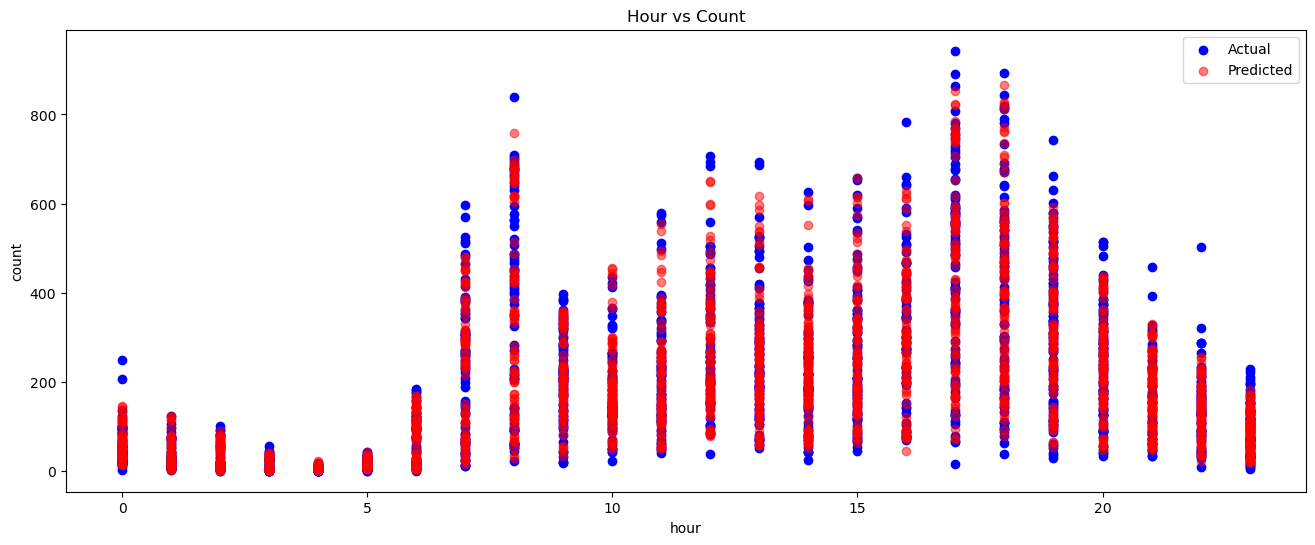

In [41]:
fig, axs = plt.subplots(1, 1, figsize = (16,6))

axs.scatter(X_test['hour'], y_test, color='blue', label='Actual')
axs.scatter(X_test['hour'], y_pred_rf_select, color='red', label='Predicted', alpha=0.5)
axs.set_xlabel('hour')
axs.set_ylabel('count')
axs.set_title('Hour vs Count')
axs.legend()

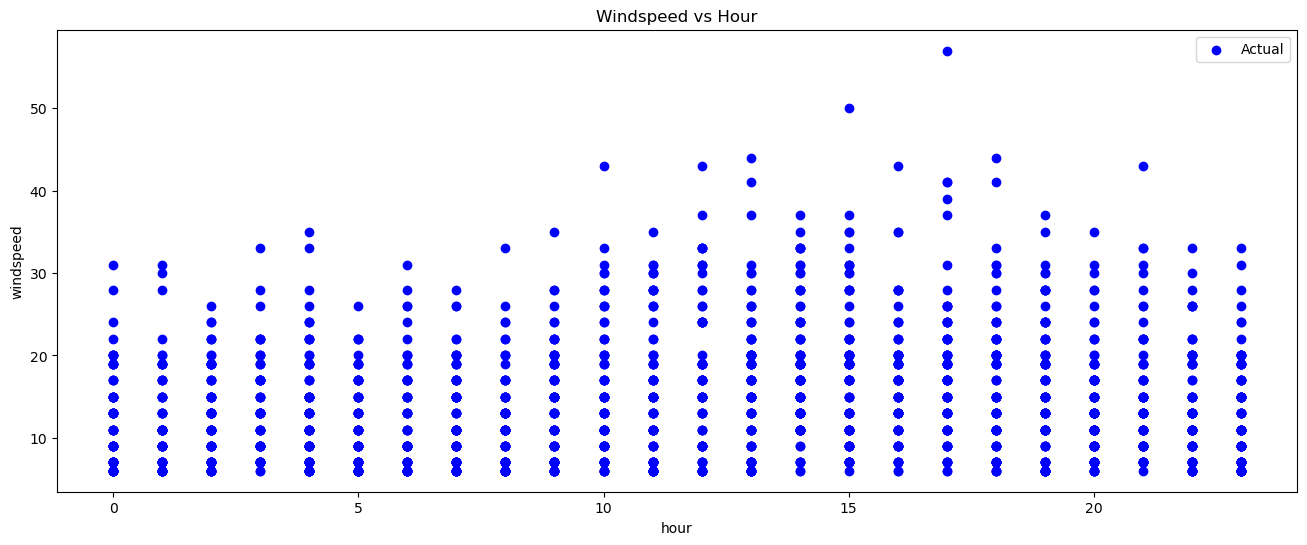

In [42]:
fig, axs = plt.subplots(1, 1, figsize = (16,6))

axs.scatter(X_test['hour'], X_test['windspeed'], color='blue', label='Actual')
axs.set_xlabel('hour')
axs.set_ylabel('windspeed')
axs.set_title('Windspeed vs Hour')
axs.legend()

# 실험 결과

Linear model 과 Random Forest model 비교 시 Random Forest model이 더 좋은 평가 지표가 나옴   

MSE:  20019.587045335356   
RMSE:  141.49058995330876   
Random Forest model MSE:  6682.768292845953   
Random Forest model RMSE:  81.74820054806071         

Random Forest 에서 feature important를 활용해 feature selection을 해봤더니 이전보다 좋은 지표가 나옴. 하지만, 모든 feature를 넣었을 때와 차이는 별로 없었음   

Random Forest model all features MSE:  2096.0744392167103   
Random Forest model all features RMSE:  45.78290553489053        

Random Forest model selected features MSE:  2085.0184727937335   
Random Forest model selected features RMSE:  45.662002505296826       

여기서 착안하여 Random Forest model 에서 중요한 features 는 Linear model 에서도 중요하다는 접근으로 생각하여   
Linear model에 중요한 feature만 적용시켜 보았더니 기존 Linear model 과 큰 차이는 없음  

MSE feature selected :  19629.632627422918   
RMSE feature selected :  140.10579084185963   

registered 와 casual이 count와 합 관계여서 이전에 실험 했을 때 linear model이 가장 낮게 나오는 현상이 있었지만 지금은 registered 와 casual이 있으면 안된다는 것을 알고 제거.   